# Preamble

In [1]:
import os
import json
import h5py
import argparse
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.optimize import curve_fit
from pprint import pprint
import tinydb as db
from tinydb.storages import MemoryStorage
import pdb
import pygama.utils as pgu

import matplotlib
# matplotlib.use('Agg') # when running on cori
import matplotlib.pyplot as plt
#plt.style.use('../clint.mpl')
from matplotlib.colors import LogNorm

from pygama import DataGroup
import pygama.lh5 as lh5
import pygama.analysis.histograms as pgh
import pygama.analysis.peak_fitting as pgf
import psd_analysis as psd

import calibration_jdetwiler as cb


dg = DataGroup('/global/homes/f/fnafis/krstc/krstc.json', load=True)
    
fontsize = 20  
def draw_canvas(plt, fontsize=fontsize, xlabel='xlabel', ylabel='count', title='title'):
    plt.figure(figsize=(20,16))
    plt.xticks(fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    plt.xlabel(xlabel, fontsize=fontsize*1.5)
    plt.ylabel(ylabel, fontsize=fontsize*1.5)
    plt.legend(fontsize=fontsize)
    plt.title(title, fontsize=fontsize*2)
    
fileDB = pd.read_hdf('/global/cfs/cdirs/legend/software/KrSTC/data/fileDB.h5')

ModuleNotFoundError: No module named 'pygama.utils'

# dt cut 
dt = time difference between successive events
   = time difference between rise of waveforms of successive events

In [ ]:
beginning_cycle = 2019
cycle_range_bkg = [2028,2038, 'bkg_run2'] #run 2
#cycle_range_bkg = [2115,2121, 'bkg_run8']
cycle_range = [2039,2059, 'kry_run3'] #gain=1.0
#cycle_range = [2059,2093, 'kry_run4'] #gain>1.0
#cycle_range = [2093,2100, 'kry_run5'] #gain=1.0
#cycle_range = [2147, 2202, 'kry_run12']
#cycle_range = [2203, 2210, 'kry_run13']
#cycle_range = [2280, 2332, 'kry_run17']


runtime_bkg = fileDB['runtime'][cycle_range_bkg[0]-beginning_cycle:cycle_range_bkg[1]-beginning_cycle].sum()
runtime = fileDB['runtime'][cycle_range[0]-beginning_cycle:cycle_range[1]-beginning_cycle].sum()



lh5_dir = dg.lh5_dir
dsp_list = lh5_dir + dg.fileDB['dsp_path'] + '/' + dg.fileDB['dsp_file']


hit_list = dsp_list[cycle_range[0]-beginning_cycle:cycle_range[1]-beginning_cycle]

hit_list_bkg = dsp_list[cycle_range_bkg[0]-beginning_cycle:cycle_range_bkg[1]-beginning_cycle]



#hit_list = dsp_list[2039-2019]
'''
columns in file:
        ['trapEmax', 'bl', 'bl_sig', 'A_10', 'AoE', 'packet_id', 'ievt', 'energy',
        'energy_first', 'timestamp', 'crate', 'card', 'channel', 'energy_cal',
        'trapEmax_cal']'''


df_hit = lh5.load_dfs(hit_list, ['trapEmax', 'bl', 'bl_sig', 'A_10', 'timestamp', 'ToE', 'bl_slope'], 'ORSIS3302DecoderForEnergy/dsp')

df_hit_bkg = lh5.load_dfs(hit_list_bkg, ['trapEmax', 'bl', 'bl_sig', 'A_10', 'timestamp', 'ToE'], 'ORSIS3302DecoderForEnergy/dsp')


#timestamp is in unit of 10ns.
current_pars = [0.430, -0.09979]
df_hit['trapEmax_cal'] = np.polyval(current_pars, df_hit['trapEmax'])
df_hit_bkg['trapEmax_cal'] = np.polyval(current_pars, df_hit_bkg['trapEmax'])

loading data for /global/cfs/cdirs/m2676/data/krstc/LH5/dsp/krstc_run3_cyc2039_dsp.lh5 /global/cfs/cdirs/m2676/data/krstc/LH5/dsp/krstc_run3_cyc2040_dsp.lh5 /global/cfs/cdirs/m2676/data/krstc/LH5/dsp/krstc_run3_cyc2041_dsp.lh5 /global/cfs/cdirs/m2676/data/krstc/LH5/dsp/krstc_run3_cyc2042_dsp.lh5 /global/cfs/cdirs/m2676/data/krstc/LH5/dsp/krstc_run3_cyc2043_dsp.lh5 /global/cfs/cdirs/m2676/data/krstc/LH5/dsp/krstc_run3_cyc2044_dsp.lh5 /global/cfs/cdirs/m2676/data/krstc/LH5/dsp/krstc_run3_cyc2045_dsp.lh5 /global/cfs/cdirs/m2676/data/krstc/LH5/dsp/krstc_run3_cyc2046_dsp.lh5 /global/cfs/cdirs/m2676/data/krstc/LH5/dsp/krstc_run3_cyc2047_dsp.lh5 /global/cfs/cdirs/m2676/data/krstc/LH5/dsp/krstc_run3_cyc2048_dsp.lh5 /global/cfs/cdirs/m2676/data/krstc/LH5/dsp/krstc_run3_cyc2049_dsp.lh5 /global/cfs/cdirs/m2676/data/krstc/LH5/dsp/krstc_run3_cyc2050_dsp.lh5 /global/cfs/cdirs/m2676/data/krstc/LH5/dsp/krstc_run3_cyc2051_dsp.lh5 /global/cfs/cdirs/m2676/data/krstc/LH5/dsp/krstc_run3_cyc2052_dsp.lh5 /gl

In [ ]:
df_hit

,trapEmax,bl,bl_sig,A_10,timestamp,ToE,bl_slope,trapEmax_cal
0,2772.634277,58088.734375,4.503426,143.163239,5019890,0.473090,-0.000044,1192.133057
1,268.137817,58090.820312,4.401128,17.321457,6496549,0.560019,-0.000362,115.199471
2,5798.042969,58089.191406,4.655836,291.449860,8347318,0.467755,-0.000078,2493.058594
3,847.039734,58088.488281,4.665301,57.867638,9045359,0.626714,-0.000113,364.127289
4,420.997101,58088.519531,4.420192,30.026876,10068139,0.665433,0.000029,180.928970
...,...,...,...,...,...,...,...,...
2439429,2200.553223,58086.570312,4.036271,149.864151,155940015671,0.621994,-0.000167,946.138123
2439430,364.149994,58082.210938,4.323108,24.931391,155940473644,0.625882,0.000763,156.484711
2439431,339.565002,58087.382812,4.170303,21.724407,155942062557,0.599796,-0.000407,145.913162
2439432,368.580933,58087.437500,4.214206,27.825577,155943690470,0.678883,0.000454,158.390015


No handles with labels found to put in legend.


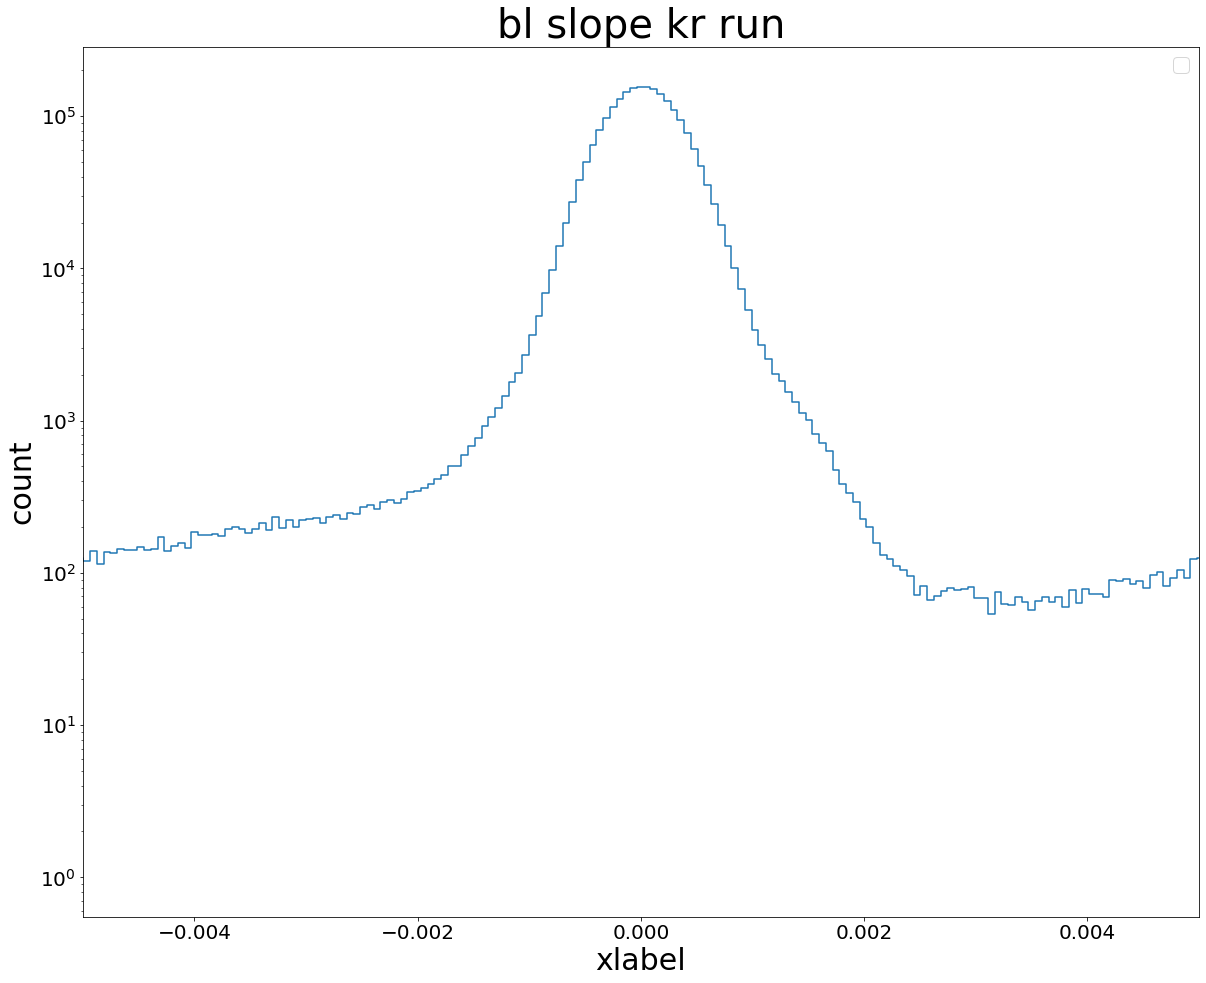

In [ ]:
h, b, v = pgh.get_hist(df_hit['bl_slope'], bins=50000)
draw_canvas(plt, title='bl slope kr run')
pgh.plot_hist(h,b)
plt.xlim(-0.005,0.005)
plt.yscale('log')

### Why is the time difference between events important?
A: events happening too close to previous one will not have well defined baseline and also affect the topline (=trapEmax) of the previous one, that's why. Also infact these too close happening events make the topline slope down instead of staying constant.

## hist of parameters

No handles with labels found to put in legend.


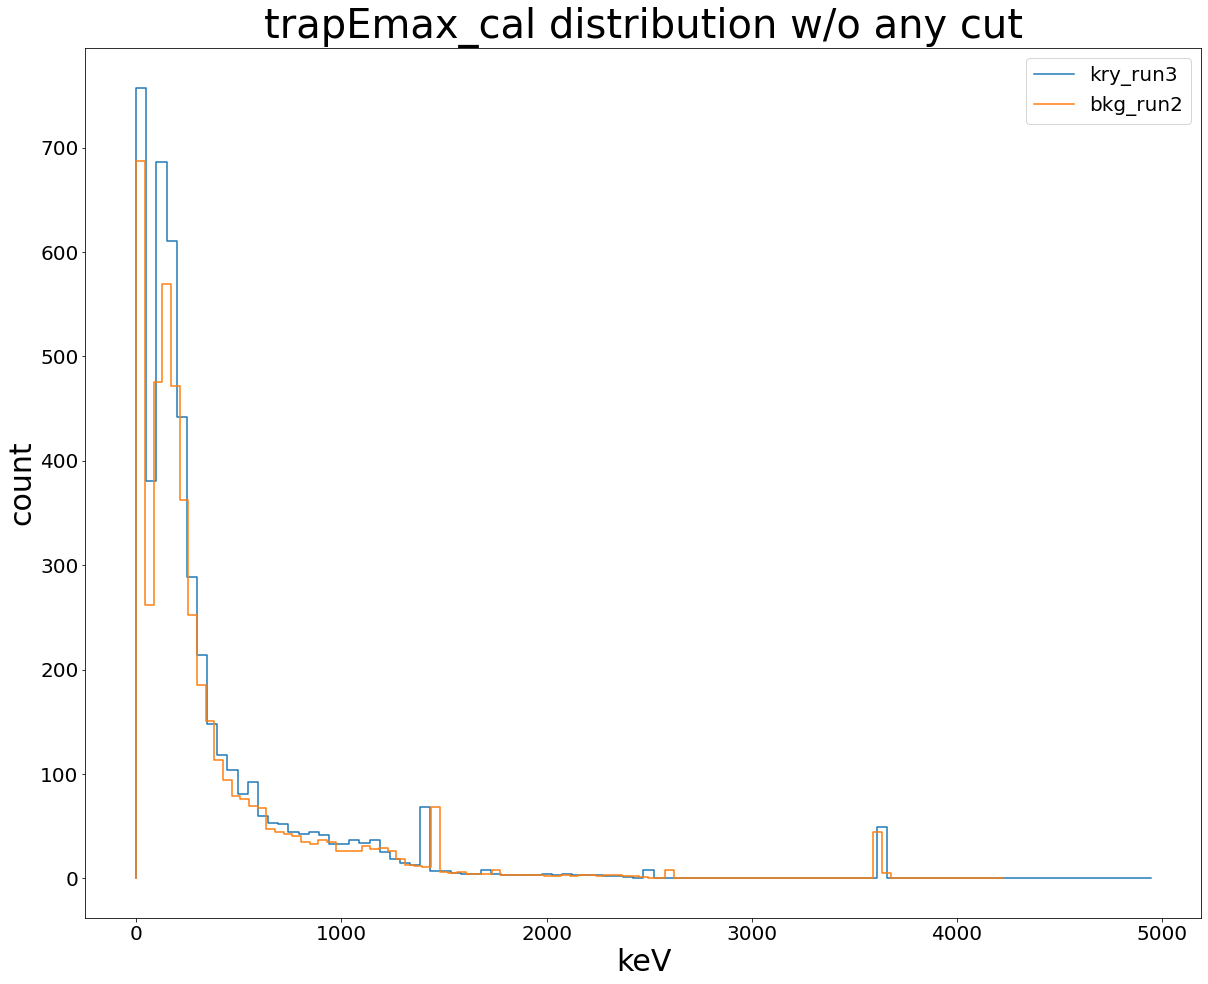

In [ ]:
ene_hist_kr, ene_bins_kr, ene_var_kr = pgh.get_hist(df_hit['trapEmax_cal'])
ene_hist_bkg, ene_bins_bkg, ene_var_bkg = pgh.get_hist(df_hit_bkg['trapEmax_cal'])


draw_canvas(plt, title='trapEmax_cal distribution w/o any cut', xlabel='keV')
pgh.plot_hist(ene_hist_kr/runtime, ene_bins_kr, label=cycle_range[2])
pgh.plot_hist(ene_hist_bkg/runtime_bkg, ene_bins_bkg, label=cycle_range_bkg[2])
plt.legend(fontsize=20)

No handles with labels found to put in legend.


58090.49 58087.42
57548.23828125 57477.6953125


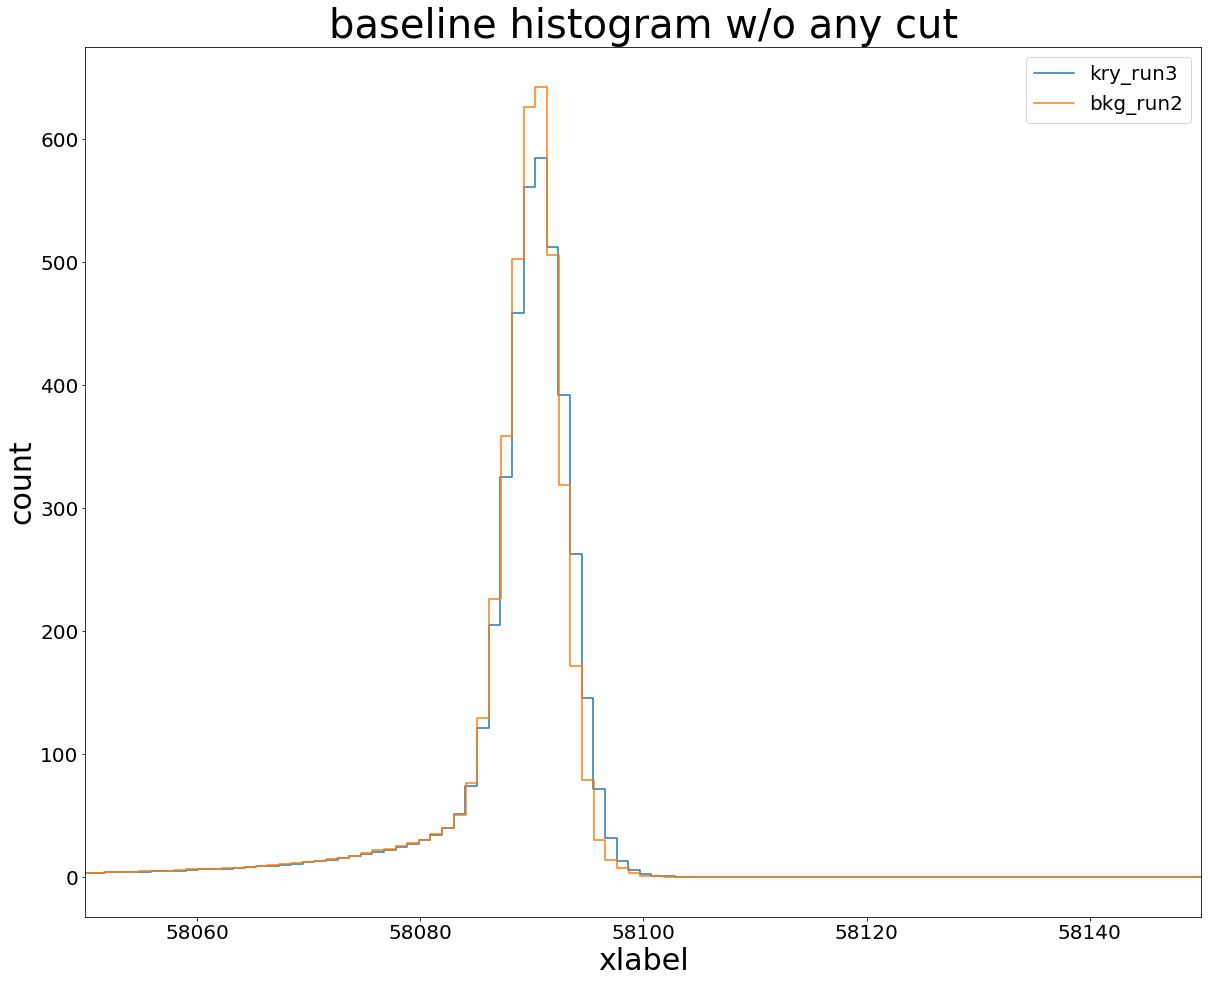

In [ ]:
kr_mode = stats.mode(df_hit['bl'])
bkg_mode = stats.mode(df_hit_bkg['bl'])
print(kr_mode[0][0], bkg_mode[0][0])
mode_diff = bkg_mode[0][0]-kr_mode[0][0]


bl_hist_kr, bl_bins_kr, bl_var_kr = pgh.get_hist(df_hit['bl'], bins=10000)
#aligning modes
bl_hist_bkg, bl_bins_bkg, bl_var_bkg = pgh.get_hist(df_hit_bkg['bl']-mode_diff, bins=10000)
draw_canvas(plt, title='baseline histogram w/o any cut')
pgh.plot_hist(bl_hist_kr/runtime, bl_bins_kr, label=cycle_range[2])
pgh.plot_hist(bl_hist_bkg/runtime_bkg, bl_bins_bkg, label=cycle_range_bkg[2])
plt.legend(fontsize=20)
plt.xlim(58050,58150)
print(np.mean(df_hit['bl']), np.mean(df_hit_bkg['bl']))



No handles with labels found to put in legend.


(3.0, 6.0)

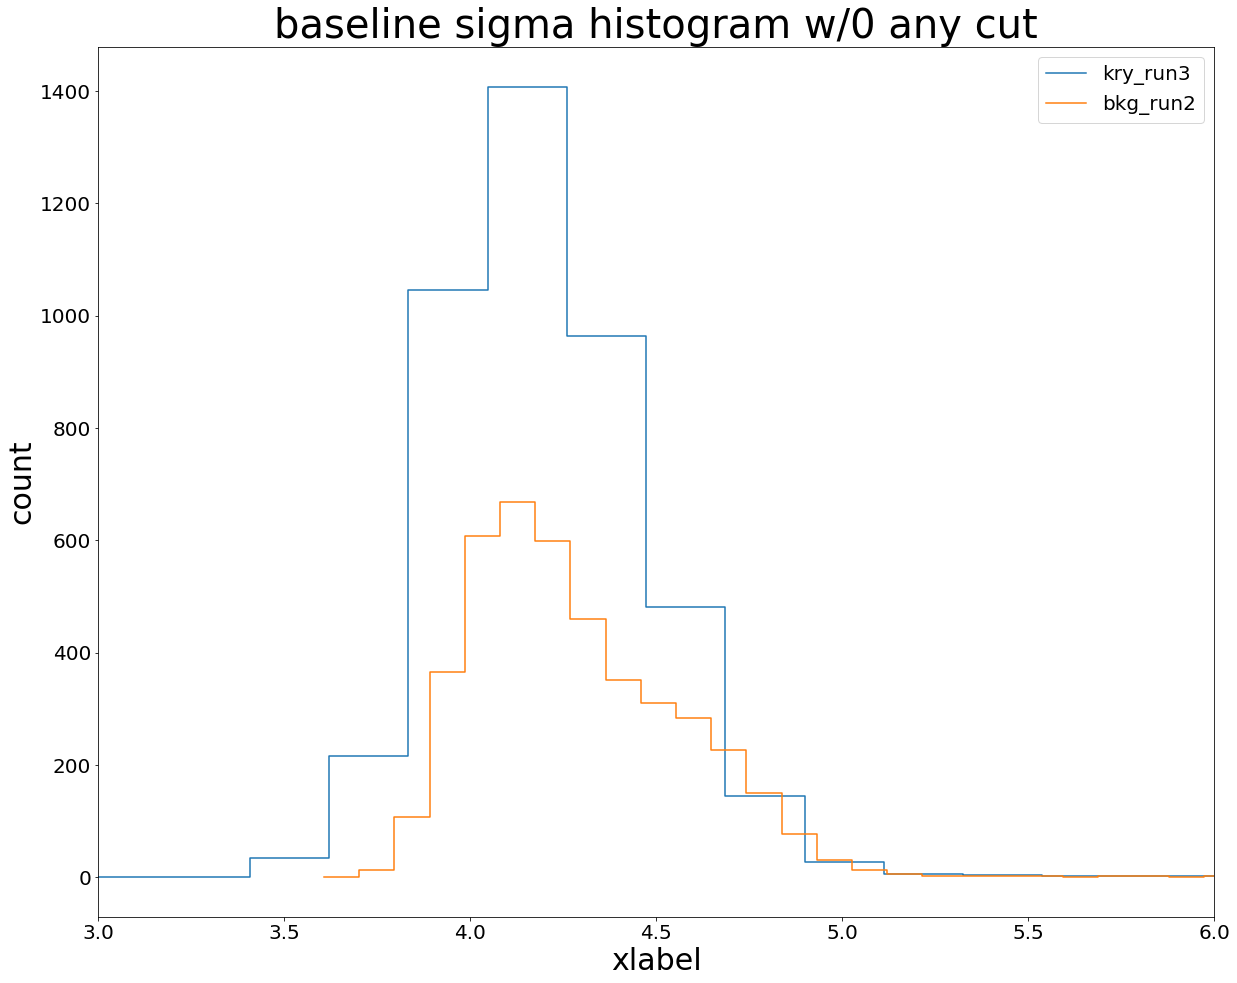

In [ ]:
bl_sig_hist_kr, bl_sig_bins_kr, bl_sig_var_kr = pgh.get_hist(df_hit['bl_sig'], bins=10000)
bl_sig_hist_bkg, bl_sig_bins_bkg, bl_sig_var_bkg = pgh.get_hist(df_hit_bkg['bl_sig'], bins=10000)
draw_canvas(plt, title='baseline sigma histogram w/0 any cut')
pgh.plot_hist(bl_sig_hist_kr/runtime, bl_sig_bins_kr, label=cycle_range[2])
pgh.plot_hist(bl_sig_hist_bkg/runtime_bkg, bl_sig_bins_bkg, label=cycle_range_bkg[2])
plt.legend(fontsize=20)
plt.xlim(3,6)

### Energy spectrum for dt cuts

In [ ]:
etype='trapEmax_cal'

elo = 0
ehi = 4000

n_bins = 4000*5

kev_per_bin = (ehi-elo)/n_bins

No handles with labels found to put in legend.


(2240957, 8)


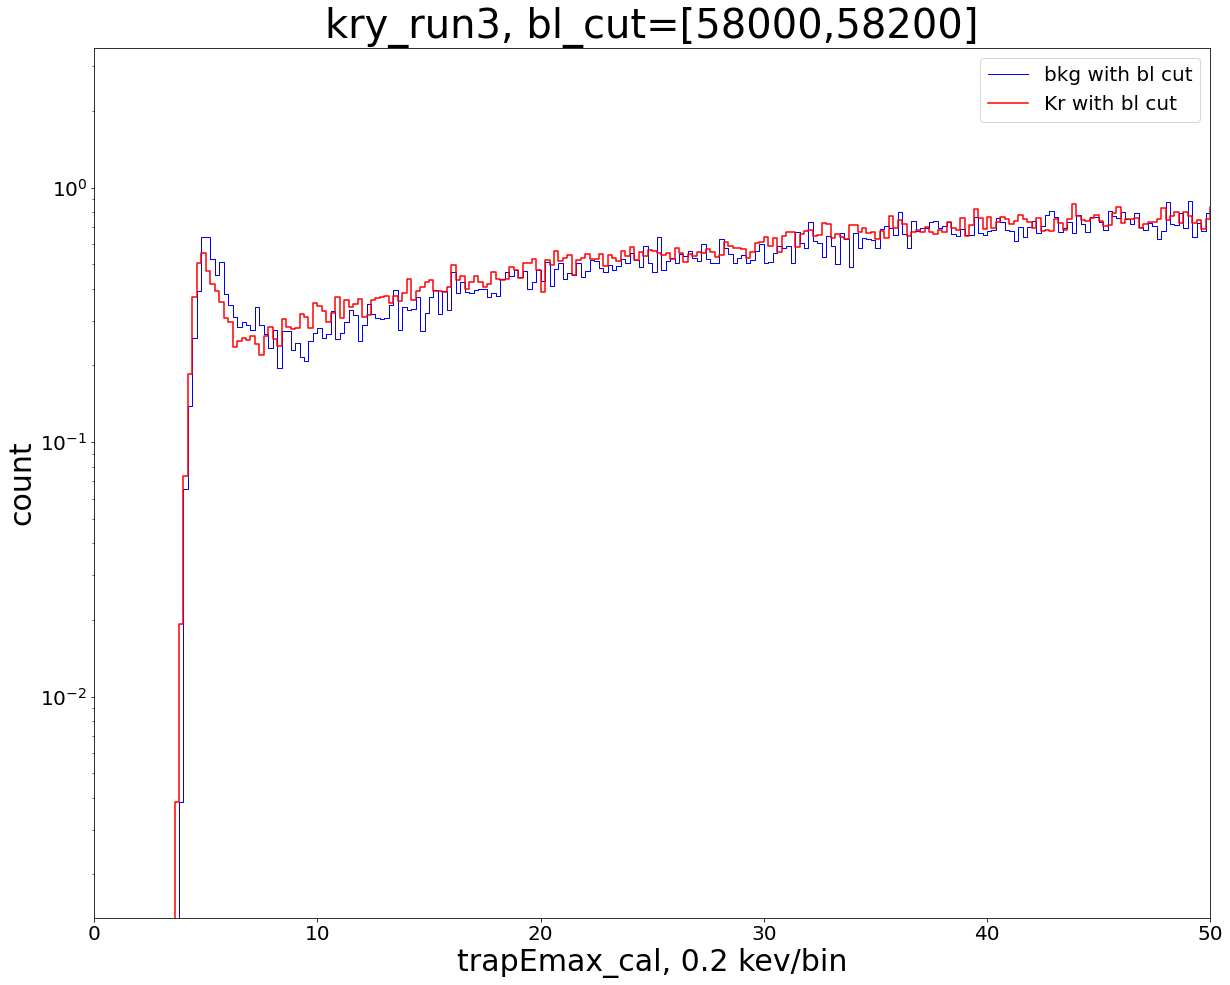

In [ ]:
parameter = 'bl'
bl_cut_range = [58000,58200]
toe_cut_range = [0.6,0.66]


df_hit_bl_cut = df_hit[(df_hit[parameter]>bl_cut_range[0]) & (df_hit[parameter]<bl_cut_range[1])]
df_hit_bkg_bl_cut = df_hit_bkg[(df_hit_bkg[parameter]>bl_cut_range[0]) & (df_hit_bkg[parameter]<bl_cut_range[1])]

#df_hit_bl_cut=df_hit
#df_hit_bkg_bl_cut=df_hit_bkg

df_hit_bl_cut_toe_cut = df_hit_bl_cut[(df_hit_bl_cut['ToE']>toe_cut_range[0]) & (df_hit_bl_cut['ToE']<toe_cut_range[1])]
df_hit_bkg_bl_cut_toe_cut = df_hit_bkg_bl_cut[(df_hit_bkg_bl_cut['ToE']>toe_cut_range[0]) & (df_hit_bkg_bl_cut['ToE']<toe_cut_range[1])]

print(df_hit_bl_cut.shape)

draw_canvas(plt, xlabel=etype+', '+ str(kev_per_bin)+' kev/bin', ylabel='count', title=cycle_range[2]+', bl_cut=['+
      str(bl_cut_range[0])+','+ str(bl_cut_range[1])+']')



h0, x0, v0 = pgh.get_hist(df_hit_bkg_bl_cut_toe_cut[etype], range=(elo, ehi), bins=n_bins)
#h0, x0, v0 = pgh.get_hist(df_hit_bkg_bl_cut[etype], range=(elo, ehi), bins=n_bins)


h0=h0/runtime_bkg
pgh.plot_hist(h0, x0, c='b', lw=1, label='bkg with bl cut')
#plt.yscale('log')
h00, x00, v00 = pgh.get_hist(df_hit_bkg[etype], range=(elo, ehi), bins=n_bins)
h00=h00/runtime_bkg


#pgh.plot_hist(h00, x00, c='m', lw=1, label='bkg without any cut')
#plt.yscale('log')


h1, x1, v1 = pgh.get_hist(df_hit[etype], range=(elo, ehi), bins=n_bins)
scaling_factor = np.average(h1[200:220])/np.average(h0[200:220])
#h1=h1/scaling_factor
h1=h1/runtime
#x1 = x1[2:]
#pgh.plot_hist(h1, x1, c='k', lw=1, label='Kr without any cut')
#plt.yscale('log')


h2, x2, v2 = pgh.get_hist(df_hit_bl_cut_toe_cut[etype], range=(elo, ehi), bins=n_bins)
#h2, x2, v2 = pgh.get_hist(df_hit_bl_cut[etype], range=(elo, ehi), bins=n_bins)


#scaling_factor = np.average(h2[200:220])/np.average(h0[200:220])
#h2=h2/scaling_factor
h2=h2/runtime
pgh.plot_hist(h2,x2, color='r', label='Kr with bl cut')
plt.yscale('log')
plt.xlim(0,50)

plt.legend(fontsize=fontsize)
#plt.ylim(0.25,2)

In [ ]:
len(df_hit)

2439434

In [ ]:
len(df_hit_bkg)

1219601

# bl_sigma cuts

No handles with labels found to put in legend.


(0.0, 10.0)

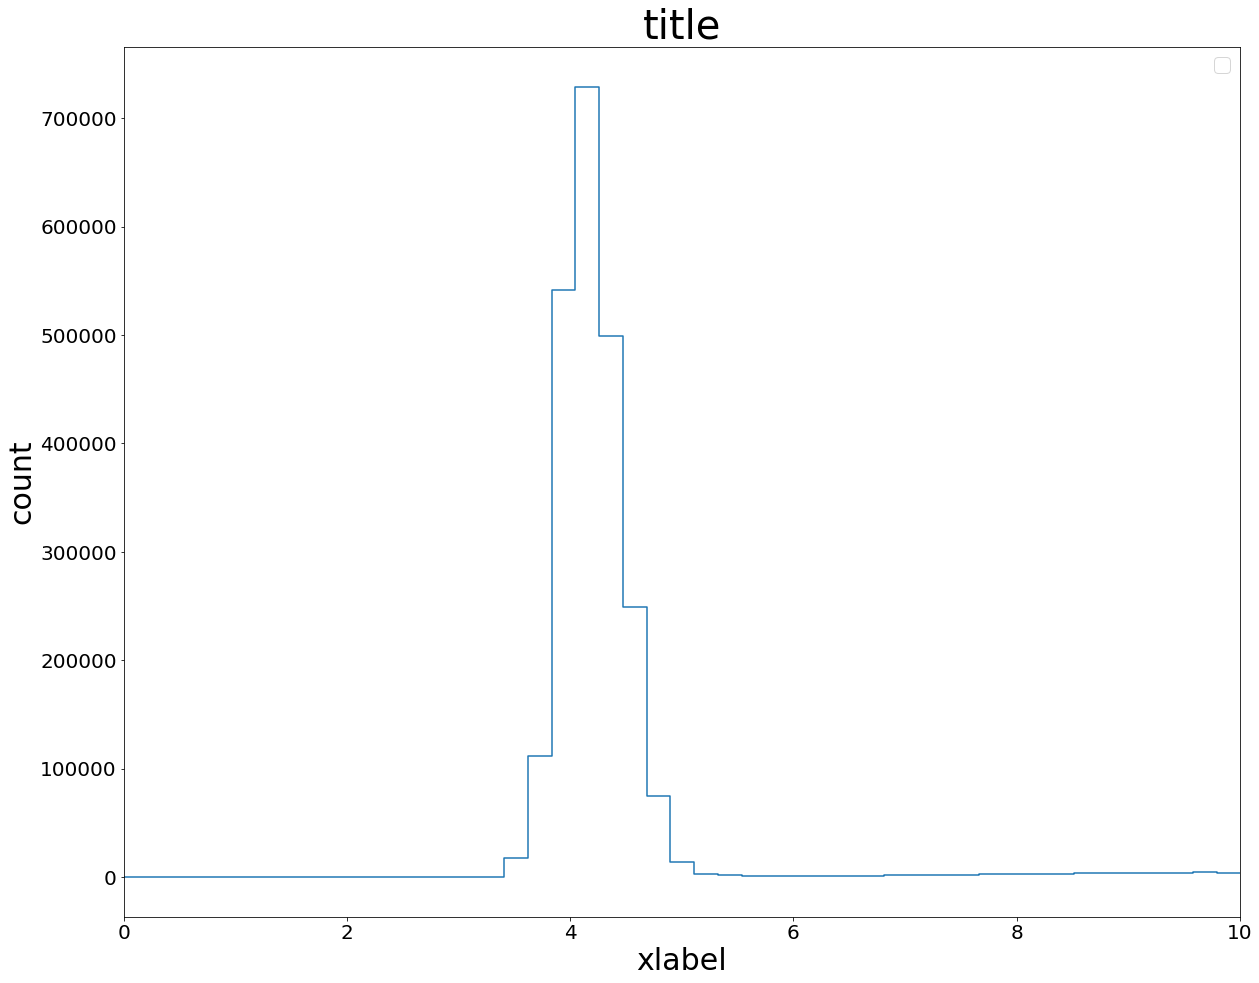

In [ ]:
parameter = 'bl_sig'
bl_sigma = df_hit[parameter]
bl_sigma_hist, bl_sigma_bins, bl_sigma_var = pgh.get_hist(bl_sigma, bins=10000)
draw_canvas(plt)
pgh.plot_hist(bl_sigma_hist, bl_sigma_bins)
plt.xlim(0,10)

No handles with labels found to put in legend.


(2242000, 8)


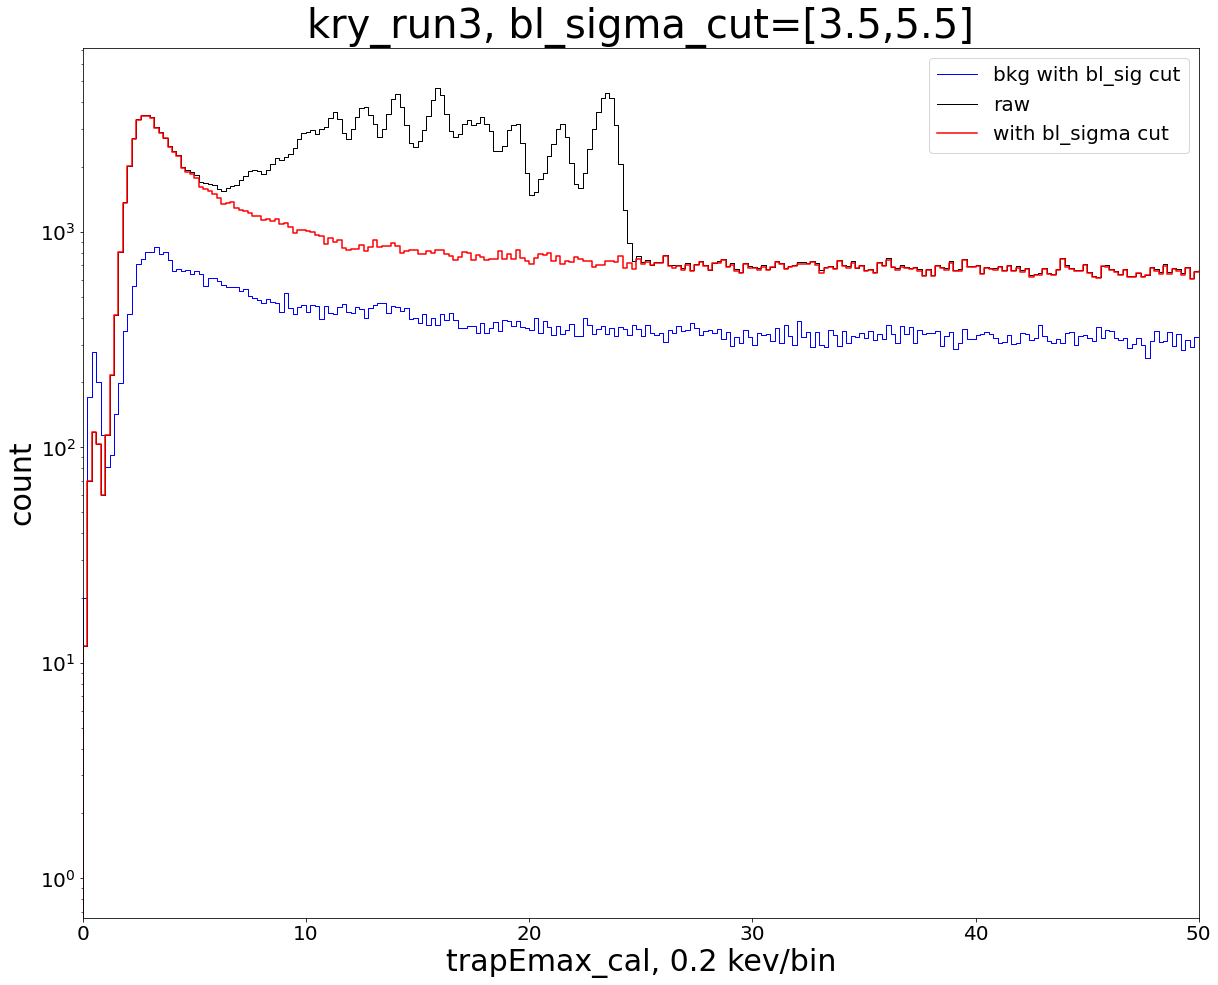

In [ ]:
bl_sigma_cut_range = [3.5,5.5]

df_hit_bl_simga_cut = df_hit[(df_hit[parameter]>bl_sigma_cut_range[0]) & (df_hit[parameter]<bl_sigma_cut_range[1])]
df_hit_bkg_bl_simga_cut = df_hit_bkg[(df_hit_bkg[parameter]>bl_sigma_cut_range[0]) & (df_hit_bkg[parameter]<bl_sigma_cut_range[1])]


print(df_hit_bl_simga_cut.shape)

draw_canvas(plt, xlabel=etype+', '+ str(kev_per_bin)+' kev/bin', ylabel='count', title=cycle_range[2]+', bl_sigma_cut=['+
      str(bl_sigma_cut_range[0])+','+ str(bl_sigma_cut_range[1])+']')


h0, x0, v0 = pgh.get_hist(df_hit_bkg_bl_simga_cut[etype], range=(elo, ehi), bins=n_bins)
#x1 = x1[2:]
pgh.plot_hist(h0, x0, c='b', lw=1, label='bkg with bl_sig cut')
plt.yscale('log')

h1, x1, v1 = pgh.get_hist(df_hit[etype], range=(elo, ehi), bins=n_bins)
#x1 = x1[2:]
pgh.plot_hist(h1, x1, c='k', lw=1, label='raw')
plt.yscale('log')


h2, x2, v2 = pgh.get_hist(df_hit_bl_simga_cut[etype], range=(elo, ehi), bins=n_bins)
pgh.plot_hist(h2,x2, color='r', label='with bl_sigma cut')
plt.yscale('log')
plt.xlim(0,50)

plt.legend(fontsize=fontsize)

# ToE (triangle filter)

In [ ]:
parameter = 'ToE'

toe = df_hit['ToE']
toe_hist, toe_bins, toe_var = pgh.get_hist(toe, bins=1000)
draw_canvas(plt, xlabel='ToE')
pgh.plot_hist(toe_hist, toe_bins)

plt.xlim(0,1)


ValueError: autodetected range of [0.049647022038698196, inf] is not finite

In [ ]:

toe_cut_range = [0.4,0.8]

df_hit_toe_cut = df_hit[(df_hit[parameter]>toe_cut_range[0]) & (df_hit[parameter]<toe_cut_range[1])]
df_hit_bkg_toe_cut = df_hit_bkg[(df_hit_bkg[parameter]>toe_cut_range[0]) & (df_hit_bkg[parameter]<toe_cut_range[1])]


print(df_hit_toe_cut.shape)

draw_canvas(plt, xlabel=etype+', '+ str(kev_per_bin)+' kev/bin', ylabel='count', title=cycle_range[2]+', ToE_cut=['+
      str(toe_cut_range[0])+','+ str(toe_cut_range[1])+']')



h0, x0, v0 = pgh.get_hist(df_hit_bkg_toe_cut[etype], range=(elo, ehi), bins=n_bins)
#x1 = x1[2:]
pgh.plot_hist(h0, x0, c='b', lw=1, label='bkg with ToE cut')
plt.yscale('log')

h1, x1, v1 = pgh.get_hist(df_hit[etype], range=(elo, ehi), bins=n_bins)
#x1 = x1[2:]
pgh.plot_hist(h1, x1, c='k', lw=1, label='raw')
plt.yscale('log')


h2, x2, v2 = pgh.get_hist(df_hit_toe_cut[etype], range=(elo, ehi), bins=n_bins)
pgh.plot_hist(h2,x2, color='r', label='with ToE cut')
plt.yscale('log')
plt.xlim(0,50)

plt.legend(fontsize=fontsize)

## Manual waveform browser

### Wfs for kr

In [ ]:
## selecting raw_files indices based on criteria
#run_and_cycle='run8_cyc2120'
run_and_cycle='run5_cyc2195'

raw_files = '/global/cfs/cdirs/legend/data/krstc/LH5/raw/krstc_'+run_and_cycle+'_raw.lh5'
dsp_files = '/global/cfs/cdirs/legend/data/krstc/LH5/dsp/krstc_'+run_and_cycle+'_dsp.lh5'

channel = 'ORSIS3302DecoderForEnergy'
# First, load a dataframe from a DSP file that we can use to make our selection:
df = lh5.load_dfs(dsp_files, ['trapEmax', 'AoE', 'bl','bl_sig', 'ToE', 'timestamp'], channel+'/dsp')
current_pars = [0.430, -0.09979]
df['trapEmax_cal'] = np.polyval(current_pars, df['trapEmax'])
#adding dt to the dataframe in unit of nanoseconds
df['dt']=0.0 #dt column will be in float
for i in range(len(df)-1):
    dt_clockticks = (df['timestamp'][i+1]-df['timestamp'][i]) #clockticks
    df['dt'][i+1] = dt_clockticks/1e5 #converted to milliseconds



trapEmax_cal_range = [3.0,4.0] #keV

bl_range = [58000,58200] #ADC

selected_rows = []
selected_rows_toe = []

for i in range(len(df)):
    if (df['trapEmax_cal'][i]>trapEmax_cal_range[0] and df['trapEmax_cal'][i]<trapEmax_cal_range[1]) and (df['bl'][i]>bl_range[0] and df['bl'][i]<bl_range[1]):
        selected_rows.append(i)
print(len(selected_rows))
#print(selected_rows)

for i in range(len(df)):
    if (df['ToE'][i]>1.0):
        selected_rows_toe.append(i)
print(len(selected_rows_toe))


dg = DataGroup('/global/homes/f/fnafis/krstc/krstc.json', load=True)
    
fontsize = 20 
def draw_canvas(plt, fontsize=fontsize, xlabel='xlabel', ylabel='count', title='title'):
    plt.figure(figsize=(20,16))
    plt.xticks(fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    plt.xlabel(xlabel, fontsize=fontsize*1.5)
    plt.ylabel(ylabel, fontsize=fontsize*1.5)
    plt.legend(fontsize=fontsize)
    plt.title(title, fontsize=fontsize*2)
    
beginning_cycle = 2019


raw_store = lh5.Store()
tb_name_raw = 'ORSIS3302DecoderForEnergy/raw'
tb_name_dsp = 'ORSIS3302DecoderForEnergy/dsp'
#data_raw, nrows = raw_store.read_object(tb_name, f_raw)
data_raw, nrows = raw_store.read_object(tb_name_raw, raw_files)


bulk_wfs = data_raw['waveform']['values'].nda

#wf = bulk_wfs[5]
clockticks = np.arange(0, bulk_wfs.shape[1], 1)
time = clockticks/100 #in us
draw_canvas(plt, xlabel='time (us)', ylabel='ADC', title='wfs with savgol filter')
#plt.plot(time, wf)
n_wfs = 5
#for i in range(n_wfs):
#    plt.plot(time, bulk_wfs[selected_rows[i]])
    
    
from scipy import signal as sig
for i in range(n_wfs):
    wf_filtered = sig.savgol_filter(bulk_wfs[selected_rows_toe[i]],51,1)
    print(selected_rows_toe[i],df['ToE'][selected_rows_toe[i]],df['trapEmax_cal'][selected_rows_toe[i]])
    plt.plot(time,wf_filtered)
    
    
wf_filtered = sig.savgol_filter(bulk_wfs[selected_rows],51,1)
superpulse = np.mean(wf_filtered, axis=0)
#plt.plot(time, superpulse)

### Wfs for bkg

In [ ]:
## selecting raw_files indices based on criteria
#run_and_cycle='run8_cyc2120'
#run_and_cycle='run5_cyc2095'
run_and_cycle='run2_cyc2029'


channel='ORSIS3302DecoderForEnergy'
raw_files = '/global/cfs/cdirs/legend/data/krstc/LH5/raw/krstc_'+run_and_cycle+'_raw.lh5'
dsp_files = '/global/cfs/cdirs/legend/data/krstc/LH5/dsp/krstc_'+run_and_cycle+'_dsp.lh5'

# First, load a dataframe from a DSP file that we can use to make our selection:
df = lh5.load_dfs(dsp_files, ['trapEmax', 'AoE', 'bl','bl_sig','bl_slope','ToE', 'timestamp', 'triEmax'], channel+'/dsp')
current_pars = [0.430, -0.09979]
print(df)
df['trapEmax_cal'] = np.polyval(current_pars, df['trapEmax'])
#adding dt to the dataframe in unit of nanoseconds
df['dt']=0.0 #dt column will be in float
for i in range(len(df)-1):
    dt_clockticks = (df['timestamp'][i+1]-df['timestamp'][i]) #clockticks
    df['dt'][i+1] = dt_clockticks/1e5 #converted to milliseconds



raw_store = lh5.Store()
tb_name_raw = 'ORSIS3302DecoderForEnergy/raw'
tb_name_dsp = 'ORSIS3302DecoderForEnergy/dsp'
#data_raw, nrows = raw_store.read_object(tb_name, f_raw)
data_raw, nrows = raw_store.read_object(tb_name_raw, raw_files)


bulk_wfs_bkg = data_raw['waveform']['values'].nda

loading data for /global/cfs/cdirs/legend/data/krstc/LH5/dsp/krstc_run2_cyc2029_dsp.lh5
           trapEmax       AoE            bl    bl_sig  bl_slope       ToE  \
0         15.321813  0.143677  58088.265625  3.999048  0.000158  0.548986   
1        677.454102  0.069015  58085.121094  4.275802 -0.000045  0.629723   
2         61.369816  0.071800  58091.003906  3.928453 -0.000717  0.620160   
3        127.633507  0.069790  58087.960938  3.943289 -0.000203  0.586034   
4        210.903656  0.065986  58088.445312  3.996402 -0.000531  0.605890   
...             ...       ...           ...       ...       ...       ...   
121850   486.306732  0.071017  58077.921875  4.096324 -0.000259  0.644255   
121851   757.674988  0.068183  58090.796875  4.223737  0.000648  0.622263   
121852  1169.088257  0.044707  58084.429688  4.033845  0.000156  0.413086   
121853   102.878883  0.069100  58048.156250  4.567335  0.000595  0.582156   
121854   170.801910  0.070332  58087.230469  4.489332 -0.000292  

<ipython-input-63-6a39cd9f2b1b>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dt'][i+1] = dt_clockticks/1e5 #converted to milliseconds


121855


No handles with labels found to put in legend.


1037
318
sh (8192,)
sh (8192,)
sh (8192,)
4022


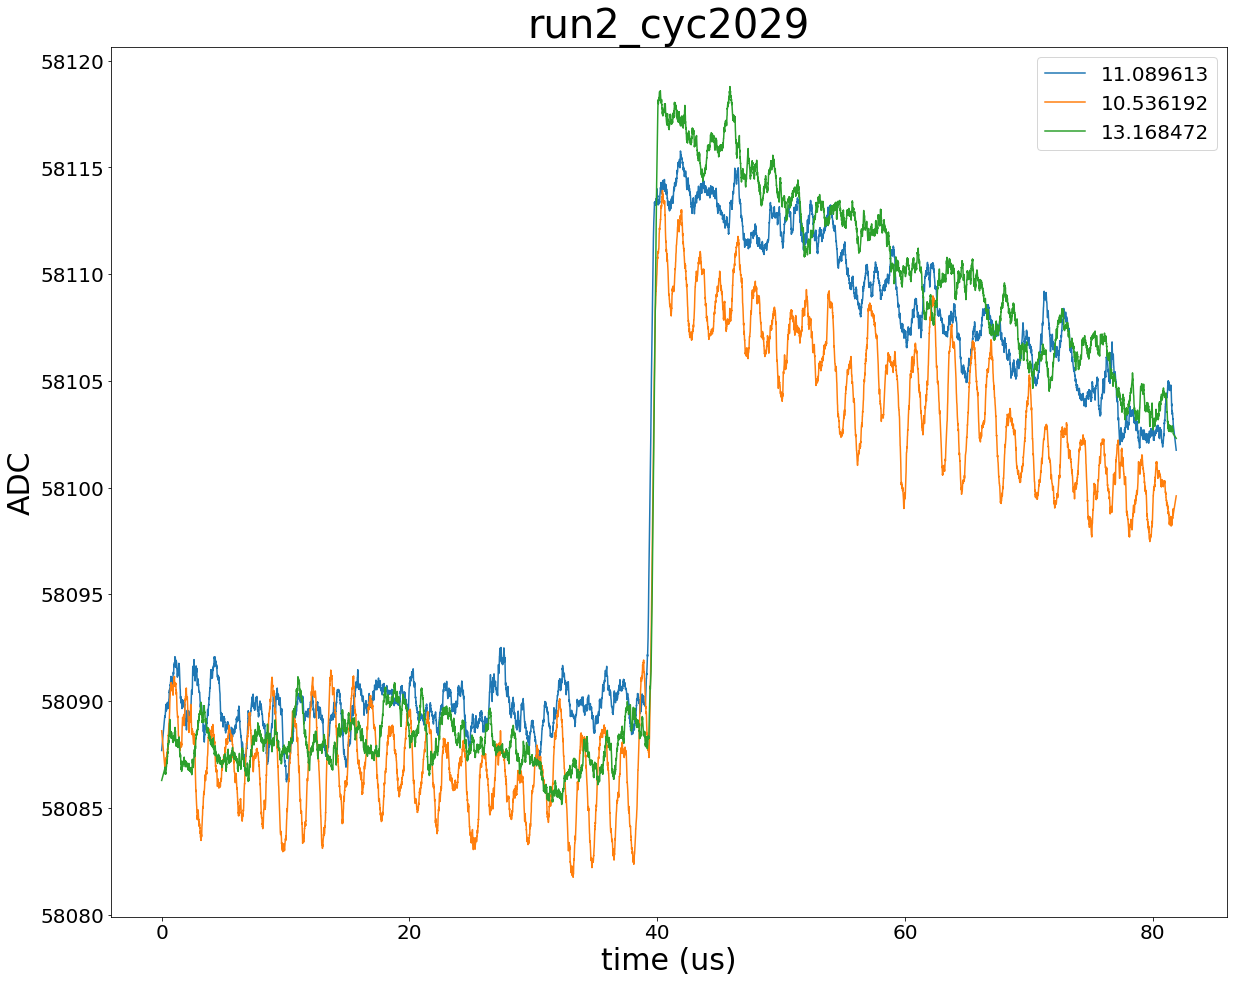

In [ ]:


trapEmax_cal_range = [10.0,15.0] #keV
bl_range = [58000,58200] #ADC
bl_slope_range = [-0.001,0.001]
toe_range=[0.6,0.7]

selected_rows = []
selected_rows_ene = []
selected_rows_bl = []
selected_rows_bl_slope = []
selected_rows_toe = []

selected_rows_toe_ene = []


#and (df['bl_slope'][i]>-0.005 and df['bl_slope']<0.005)
print(len(df))

for i in range(len(df)):
    if (df['trapEmax_cal'][i]>trapEmax_cal_range[0] and df['trapEmax_cal'][i]<trapEmax_cal_range[1]) and (df['bl'][i]>bl_range[0] and df['bl'][i]<bl_range[1]):
        selected_rows.append(i)
        if (df['ToE'][i]>toe_range[0] and df['ToE'][i]<toe_range[1]):
            selected_rows_toe_ene.append(i)

print(len(selected_rows))
print(len(selected_rows_toe_ene))
#print(selected_rows)
'''
for i in range(len(df)):
    if (df['trapEmax_cal'][i]>trapEmax_cal_range[0] and df['trapEmax_cal'][i]<trapEmax_cal_range[1]):
        selected_rows_ene.append(i)
        
for i in range(len(df)):
    if (df['bl'][i]>bl_range[0] and df['bl'][i]<bl_range[1]):
        selected_rows_bl.append(i)
        if (df['ToE'][i]<0.5):
            selected_rows_toe.append(i)
        
for i in range(len(df)):
    if (df['trapEmax_cal'][i]>trapEmax_cal_range[0] and df['trapEmax_cal'][i]<trapEmax_cal_range[1]) and (df['bl'][i]>bl_range[0] and df['bl'][i]<bl_range[1]) and (df['bl_slope'][i]>bl_slope_range[0] and df['bl_slope'][i]<bl_slope_range[1]):
        selected_rows_bl_slope.append(i)
        
print(len(selected_rows_bl_slope))
        




'''



dg = DataGroup('/global/homes/f/fnafis/krstc/krstc.json', load=True)
    
fontsize = 20  
def draw_canvas(plt, fontsize=fontsize, xlabel='xlabel', ylabel='count', title=run_and_cycle):
    plt.figure(figsize=(20,16))
    plt.xticks(fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    plt.xlabel(xlabel, fontsize=fontsize*1.5)
    plt.ylabel(ylabel, fontsize=fontsize*1.5)
    plt.legend(fontsize=fontsize)
    plt.title(title, fontsize=fontsize*2)
    
beginning_cycle = 2019



#wf = bulk_wfs[5]
clockticks = np.arange(0, bulk_wfs.shape[1], 1)
time = clockticks/100 #in us
draw_canvas(plt, xlabel='time (us)', ylabel='ADC')
#plt.plot(time, wf)
n_wfs = 3
#for i in range(n_wfs):
#    plt.plot(time, bulk_wfs[selected_rows[i]])
    
    
from scipy import signal as sig
for i in range(n_wfs):
    wf_filtered = sig.savgol_filter(bulk_wfs_bkg[selected_rows_toe_ene[i]],51,1)
    print('sh',wf_filtered.shape)
    # maxx = np.amax(wf_filtered)
    # minn = np.amin(wf_filtered)
    # tp50 = maxx-(maxx-minn)/2
    # max_index = np.argmax(wf_filtered)
    # tp50_index = (np.abs(wf_filtered[0:max_index]-tp50)).argmin()
    # print(np.argmax(wf_filtered), tp50, tp50_index)
    #print()
    plt.plot(time,wf_filtered, label=str(df['trapEmax_cal'][selected_rows_toe_ene[i]]))
    
plt.legend(fontsize=fontsize)
             
wf_filtered_bkg = sig.savgol_filter(bulk_wfs[selected_rows],51,1)
maxx = np.amax(wf_filtered_bkg[0])
minn = np.amin(wf_filtered_bkg[0])
tp50 = maxx-(maxx-minn)/2
max_index = np.argmax(wf_filtered_bkg[0])
tp50_index_pivot = (np.abs(wf_filtered_bkg[0][0:max_index]-tp50)).argmin()
print(tp50_index_pivot)
superpulse_bkg_prev = np.mean(wf_filtered_bkg, axis=0)


for i in range(wf_filtered_bkg.shape[0]):
    wf = wf_filtered_bkg[i]
    #print('shhh', wf.shape)
    maxx = np.amax(wf)
    minn = np.amin(wf)
    tp50 = maxx-(maxx-minn)/2
    max_index = np.argmax(wf)
    tp50_index = (np.abs(wf[0:max_index]-tp50)).argmin()
    np.roll(wf, tp50_index_pivot-tp50_index)
    
superpulse_bkg = np.mean(wf_filtered_bkg, axis=0)
#plt.plot(time, superpulse_bkg)
#plt.plot(time, superpulse_bkg_prev)

In [ ]:
## selecting raw_files indices based on criteria
#run_and_cycle='run8_cyc2120'
#run_and_cycle='run5_cyc2095'
run_and_cycle='run3_cyc2040'


channel='ORSIS3302DecoderForEnergy'
raw_files = '/global/cfs/cdirs/legend/data/krstc/LH5/raw/krstc_'+run_and_cycle+'_raw.lh5'
dsp_files = '/global/cfs/cdirs/legend/data/krstc/LH5/dsp/krstc_'+run_and_cycle+'_dsp.lh5'

# First, load a dataframe from a DSP file that we can use to make our selection:
df = lh5.load_dfs(dsp_files, ['trapEmax', 'AoE', 'bl','bl_sig','bl_slope','ToE', 'timestamp', 'triEmax'], channel+'/dsp')
current_pars = [0.430, -0.09979]
print(df)
df['trapEmax_cal'] = np.polyval(current_pars, df['trapEmax'])
#adding dt to the dataframe in unit of nanoseconds
df['dt']=0.0 #dt column will be in float
for i in range(len(df)-1):
    dt_clockticks = (df['timestamp'][i+1]-df['timestamp'][i]) #clockticks
    df['dt'][i+1] = dt_clockticks/1e5 #converted to milliseconds



raw_store = lh5.Store()
tb_name_raw = 'ORSIS3302DecoderForEnergy/raw'
tb_name_dsp = 'ORSIS3302DecoderForEnergy/dsp'
#data_raw, nrows = raw_store.read_object(tb_name, f_raw)
data_raw, nrows = raw_store.read_object(tb_name_raw, raw_files)


bulk_wfs_kr = data_raw['waveform']['values'].nda

loading data for /global/cfs/cdirs/legend/data/krstc/LH5/dsp/krstc_run3_cyc2040_dsp.lh5
           trapEmax       AoE            bl    bl_sig  bl_slope       ToE  \
0        422.138397  0.068067  58089.277344  4.044410  0.000204  0.625796   
1          6.908443  0.347493  58089.714844  4.010944 -0.000355  1.810987   
2        165.633667  0.067711  58088.406250  4.504540  0.000026  0.623286   
3        286.623230  0.068471  58090.574219  4.227704  0.000024  0.628537   
4       3800.482422  0.067808  58087.238281  3.894429  0.000072  0.621758   
...             ...       ...           ...       ...       ...       ...   
121957   152.856766  0.036034  58090.839844  4.567903 -0.000338  0.336893   
121958   980.814819  0.069714  58094.140625  4.172520 -0.000353  0.641458   
121959  2172.284180  0.046778  58094.746094  4.151340 -0.000324  0.428431   
121960   173.211960  0.069926  57997.730469  4.422466 -0.001949  0.620345   
121961   640.428406  0.072683  58074.003906  4.568736  0.000643  

<ipython-input-61-b92701c40f39>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dt'][i+1] = dt_clockticks/1e5 #converted to milliseconds


121962


No handles with labels found to put in legend.


1085
351
sh (8192,)
sh (8192,)
sh (8192,)


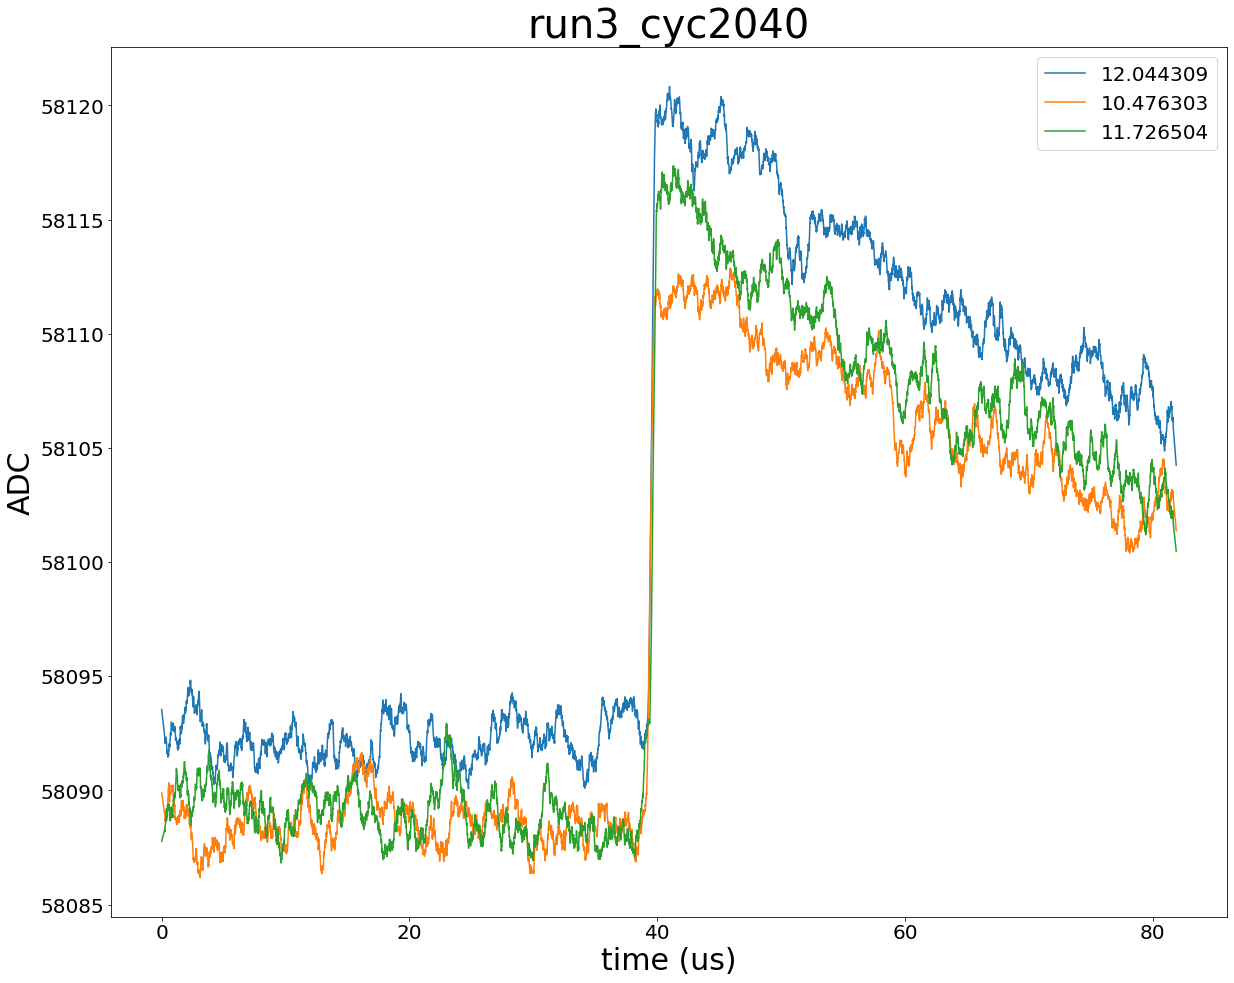

In [ ]:


trapEmax_cal_range = [10.0,15.0] #keV
bl_range = [58000,58200] #ADC
bl_slope_range = [-0.001,0.001]
toe_range=[0.6,0.7]

selected_rows = []
selected_rows_ene = []
selected_rows_bl = []
selected_rows_bl_slope = []
selected_rows_toe = []

selected_rows_toe_ene = []


#and (df['bl_slope'][i]>-0.005 and df['bl_slope']<0.005)
print(len(df))

for i in range(len(df)):
    if (df['trapEmax_cal'][i]>trapEmax_cal_range[0] and df['trapEmax_cal'][i]<trapEmax_cal_range[1]) and (df['bl'][i]>bl_range[0] and df['bl'][i]<bl_range[1]):
        selected_rows.append(i)
        if (df['ToE'][i]>toe_range[0] and df['ToE'][i]<toe_range[1]):
            selected_rows_toe_ene.append(i)

print(len(selected_rows))
print(len(selected_rows_toe_ene))
#print(selected_rows)
'''
for i in range(len(df)):
    if (df['trapEmax_cal'][i]>trapEmax_cal_range[0] and df['trapEmax_cal'][i]<trapEmax_cal_range[1]):
        selected_rows_ene.append(i)
        
for i in range(len(df)):
    if (df['bl'][i]>bl_range[0] and df['bl'][i]<bl_range[1]):
        selected_rows_bl.append(i)
        if (df['ToE'][i]<0.5):
            selected_rows_toe.append(i)
        
for i in range(len(df)):
    if (df['trapEmax_cal'][i]>trapEmax_cal_range[0] and df['trapEmax_cal'][i]<trapEmax_cal_range[1]) and (df['bl'][i]>bl_range[0] and df['bl'][i]<bl_range[1]) and (df['bl_slope'][i]>bl_slope_range[0] and df['bl_slope'][i]<bl_slope_range[1]):
        selected_rows_bl_slope.append(i)
        
print(len(selected_rows_bl_slope))
        




'''



dg = DataGroup('/global/homes/f/fnafis/krstc/krstc.json', load=True)
    
fontsize = 20  
def draw_canvas(plt, fontsize=fontsize, xlabel='xlabel', ylabel='count', title=run_and_cycle):
    plt.figure(figsize=(20,16))
    plt.xticks(fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    plt.xlabel(xlabel, fontsize=fontsize*1.5)
    plt.ylabel(ylabel, fontsize=fontsize*1.5)
    plt.legend(fontsize=fontsize)
    plt.title(title, fontsize=fontsize*2)
    
beginning_cycle = 2019




#wf = bulk_wfs[5]
clockticks = np.arange(0, bulk_wfs.shape[1], 1)
time = clockticks/100 #in us
draw_canvas(plt, xlabel='time (us)', ylabel='ADC')
#plt.plot(time, wf)
n_wfs = 3
#for i in range(n_wfs):
#    plt.plot(time, bulk_wfs[selected_rows[i]])
    
    
from scipy import signal as sig
for i in range(n_wfs):
    wf_filtered = sig.savgol_filter(bulk_wfs_kr[selected_rows_toe_ene[i]],51,1)
    print('sh',wf_filtered.shape)
    # maxx = np.amax(wf_filtered)
    # minn = np.amin(wf_filtered)
    # tp50 = maxx-(maxx-minn)/2
    # max_index = np.argmax(wf_filtered)
    # tp50_index = (np.abs(wf_filtered[0:max_index]-tp50)).argmin()
    # print(np.argmax(wf_filtered), tp50, tp50_index)
    #print()
    plt.plot(time,wf_filtered, label=str(df['trapEmax_cal'][selected_rows_toe_ene[i]]))
    
plt.legend(fontsize=fontsize)
             


121855


No handles with labels found to put in legend.


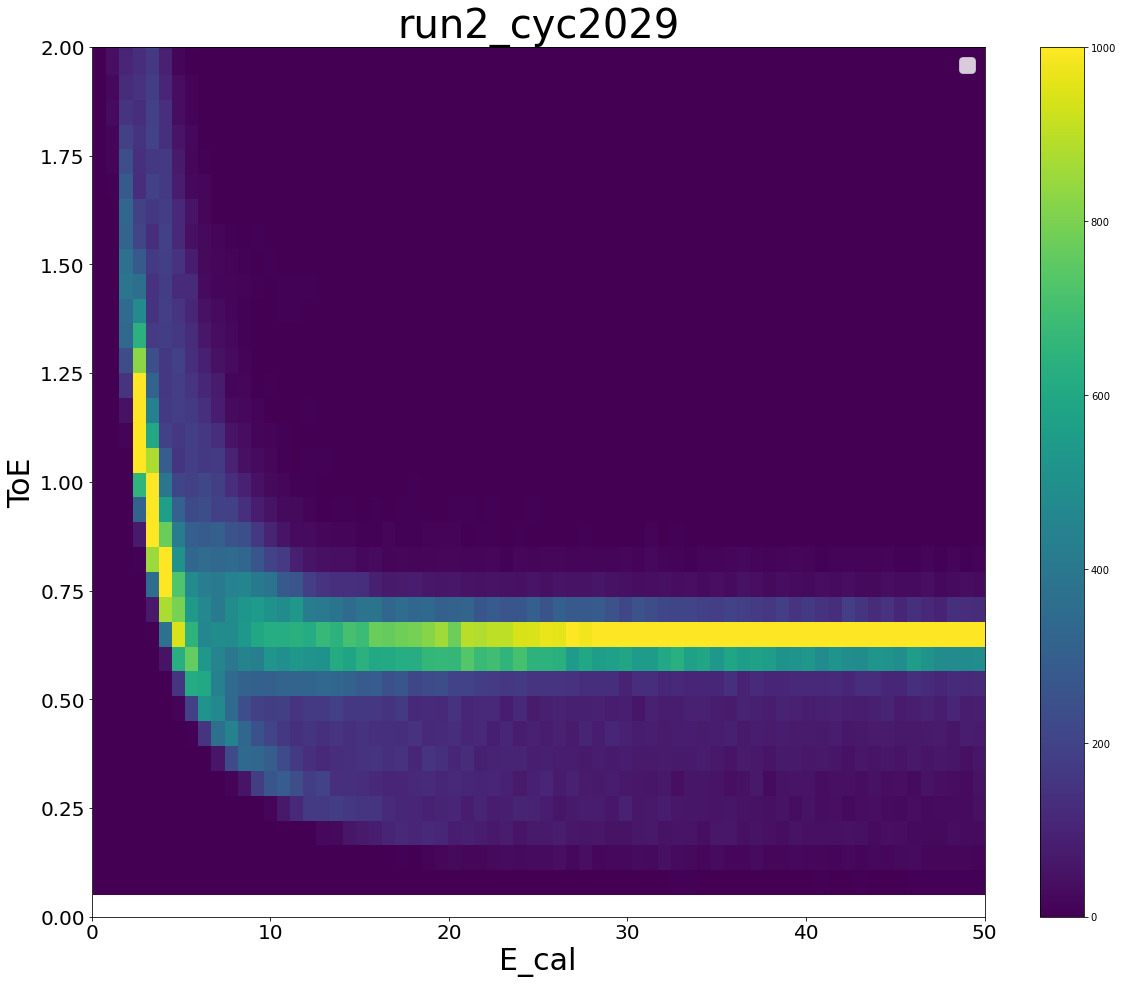

In [ ]:

trapEmax_cal_range = [3.0,4.0] #keV
bl_range = [58000,58200] #ADC
bl_slope_range = [-0.001,0.001]

selected_rows = []
selected_rows_ene = []
selected_rows_bl = []
selected_rows_bl_slope = []
selected_rows_toe = []


#and (df['bl_slope'][i]>-0.005 and df['bl_slope']<0.005)
print(len(df))

'''
for i in range(len(df)):
    if (df['trapEmax_cal'][i]>trapEmax_cal_range[0] and df['trapEmax_cal'][i]<trapEmax_cal_range[1]) and (df['bl'][i]>bl_range[0] and df['bl'][i]<bl_range[1]):
        selected_rows.append(i)

print(len(selected_rows))
#print(selected_rows)

for i in range(len(df)):
    if (df['trapEmax_cal'][i]>trapEmax_cal_range[0] and df['trapEmax_cal'][i]<trapEmax_cal_range[1]):
        selected_rows_ene.append(i)
        
for i in range(len(df)):
    if (df['bl'][i]>bl_range[0] and df['bl'][i]<bl_range[1]):
        selected_rows_bl.append(i)
        if (df['ToE'][i]<0.5):
            selected_rows_toe.append(i)
        
for i in range(len(df)):
    if (df['trapEmax_cal'][i]>trapEmax_cal_range[0] and df['trapEmax_cal'][i]<trapEmax_cal_range[1]) and (df['bl'][i]>bl_range[0] and df['bl'][i]<bl_range[1]) and (df['bl_slope'][i]>bl_slope_range[0] and df['bl_slope'][i]<bl_slope_range[1]):
        selected_rows_bl_slope.append(i)
        
print(len(selected_rows_bl_slope))
'''

for i in range(len(df_hit)):
    if (df_hit['bl'][i]>bl_range[0] and df_hit['bl'][i]<bl_range[1]):
        selected_rows_bl.append(i)
        #if (df_hit['ToE'][i]<0.5):
         #   selected_rows_toe.append(i)


draw_canvas(plt, xlabel='E_cal', ylabel='ToE', title=run_and_cycle)
plt.hist2d(df_hit['trapEmax_cal'][selected_rows_bl],df_hit['ToE'][selected_rows_bl], bins=[5000,5000])
plt.colorbar()
plt.xlim(0,50)
plt.ylim(0,2)
plt.clim(0,1000)

No handles with labels found to put in legend.


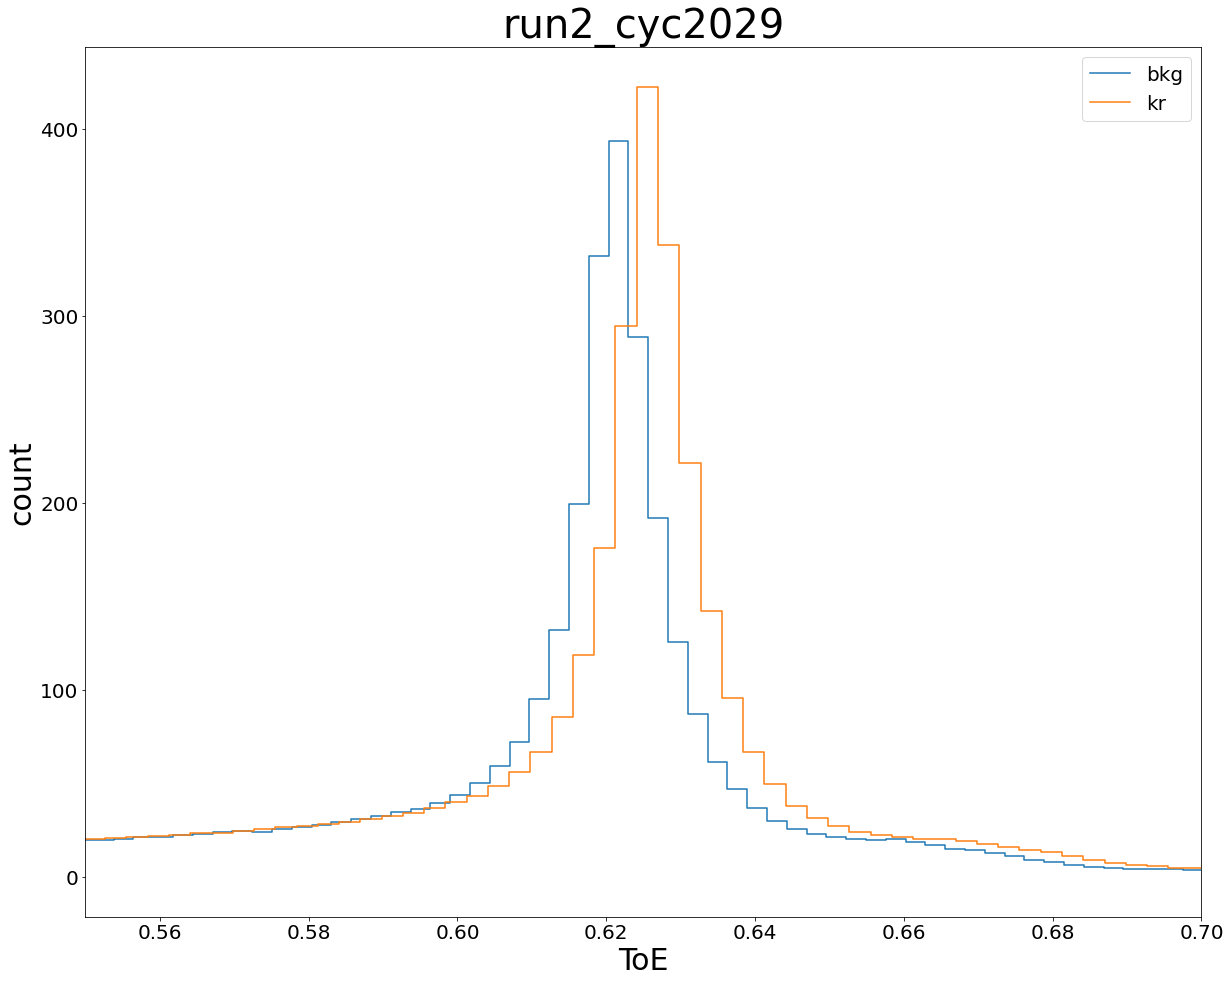

In [ ]:
hist_bkg_toe, bin_bkg_toe, var_bkg_toe = pgh.get_hist(df_hit_bkg_bl_cut['ToE'], bins=100000)
hist_bkg_toe=hist_bkg_toe/runtime_bkg
hist_toe, bin_toe, var_toe = pgh.get_hist(df_hit_bl_cut['ToE'], bins=100000)
hist_toe=hist_toe/runtime



draw_canvas(plt, xlabel='ToE')
pgh.plot_hist(hist_bkg_toe,bin_bkg_toe, label='bkg')
pgh.plot_hist(hist_toe,bin_toe, label='kr')
#plt.yscale('log')
plt.xlim(0.55,0.7)
plt.legend(fontsize=fontsize)

In [ ]:

trapEmax_cal_range = [3.0,4.0] #keV
bl_range = [58000,58200] #ADC
bl_slope_range = [-0.001,0.001]

selected_rows = []
selected_rows_ene = []
selected_rows_bl = []
selected_rows_bl_slope = []
selected_rows_toe = []




for i in range(len(df_hit_bkg)):
    if (df_hit_bkg['bl'][i]>bl_range[0] and df_hit_bkg['bl'][i]<bl_range[1]):
        selected_rows_bl.append(i)
        #if (df_hit['ToE'][i]<0.5):
         #   selected_rows_toe.append(i)


draw_canvas(plt, xlabel='E_cal', ylabel='ToE', title='bkg')
plt.hist2d(df_hit_bkg['trapEmax_cal'][selected_rows_bl],df_hit_bkg['ToE'][selected_rows_bl], bins=[5000,5000])
plt.colorbar()
plt.xlim(0,50)
plt.ylim(0,2)
plt.clim(0,1000)

In [ ]:
len(selected_rows_bl)

In [ ]:
#df = df_hit
df = df_hit_bkg

trapEmax_cal_range = [3.0,4.0] #keV
bl_range = [58000,58200] #ADC
toe_range = [0.6, 0.7]

selected_rows_toe_bl_ene = []



#and (df['bl_slope'][i]>-0.005 and df['bl_slope']<0.005)
print(len(df))

for i in range(len(df)):
    if (df['trapEmax_cal'][i]>trapEmax_cal_range[0] and df['trapEmax_cal'][i]<trapEmax_cal_range[1]) and (df['bl'][i]>bl_range[0] and df['bl'][i]<bl_range[1]):
        if (df['ToE'][i]>toe_range[0] and (df['ToE']<toe_range[1]):
            selected_rows_toe_bl_ene.append(i)

print(len(selected_rows_toe_bl_ene)





dg = DataGroup('/globaltoe_range/f/fnafis/krstc/krstc.json', load=True)
    
fontsize = 20  
def draw_canvas(plt, fontsize=fontsize, xlabel='xlabel', ylabel='count', title=run_and_cycle):
    plt.figure(figsize=(20,16))
    plt.xticks(fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    plt.xlabel(xlabel, fontsize=fontsize*1.5)
    plt.ylabel(ylabel, fontsize=fontsize*1.5)
    plt.legend(fontsize=fontsize)
    plt.title(title, fontsize=fontsize*2)
    
beginning_cycle = 2019


raw_store = lh5.Store()
tb_name_raw = 'ORSIS3302DecoderForEnergy/raw'
tb_name_dsp = 'ORSIS3302DecoderForEnergy/dsp'
#data_raw, nrows = raw_store.read_object(tb_name, f_raw)
data_raw, nrows = raw_store.read_object(tb_name_raw, raw_files)


bulk_wfs = data_raw['waveform']['values'].nda

#wf = bulk_wfs[5]
clockticks = np.arange(0, bulk_wfs.shape[1], 1)
time = clockticks/100 #in us
draw_canvas(plt, xlabel='time (us)', ylabel='ADC')
#plt.plot(time, wf)
n_wfs = 3
#for i in range(n_wfs):
#    plt.plot(time, bulk_wfs[selected_rows[i]])
    
    
from scipy import signal as sig
for i in range(n_wfs):
    wf_filtered = sig.savgol_filter(bulk_wfs[selected_rows_toe_bl_ene[i]],51,1)
    print('sh',wf_filtered.shape)
    # maxx = np.amax(wf_filtered)
    # minn = np.amin(wf_filtered)
    # tp50 = maxx-(maxx-minn)/2
    # max_index = np.argmax(wf_filtered)
    # tp50_index = (np.abs(wf_filtered[0:max_index]-tp50)).argmin()
    # print(np.argmax(wf_filtered), tp50, tp50_index)
    #print()
    plt.plot(time,wf_filtered, label=str(df['trapEmax_cal'][selected_rows_toe[i]]))
    
plt.legend(fontsize=fontsize)


In [ ]:
draw_canvas(plt)
plt.hist(df['triEmax'], bins=10000)
print("ss")
len(df)
plt.xlim(0,100)

In [ ]:
draw_canvas(plt, xlabel='E_cal', ylabel='triEmax', title=run_and_cycle)
plt.hist2d(df['trapEmax_cal'][selected_rows_bl],df['triEmax'][selected_rows_bl], bins=[2000,10000])
plt.colorbar()
plt.xlim(3,50)
plt.ylim(0,100)
plt.clim(0,50)

In [ ]:
plt.show()

In [ ]:
draw_canvas(plt, title='bl_slope hist, 3<ene_cal<4 and 58000<bl<58200')
h,b,v=pgh.get_hist(df['bl_slope'][selected_rows], bins=1000)
h1,b1,v1=pgh.get_hist(df['bl_slope'], bins=10000)
print(len(selected_rows))
print(len(selected_rows_ene))
print(len(selected_rows_bl))
h_ene, b_ene, v_ene = pgh.get_hist(df['bl_slope'][selected_rows_ene], bins=1000)
h_bl, b_bl, v_bl = pgh.get_hist(df['bl_slope'][selected_rows_bl], bins=1000)
pgh.plot_hist(h,b, label='both cuts')
pgh.plot_hist(h1,b1, label='no cut')
pgh.plot_hist(h_ene, b_ene, label='ene cut only')
pgh.plot_hist(h_bl, b_bl, label='bl cut only')
plt.xlim(-0.04,0.03)
plt.yscale('log')
plt.legend(fontsize=fontsize)

In [ ]:
draw_canvas(plt, xlabel='bl slope', ylabel='bl_sig', title='run8cyc2120, 3<e_cal<4, 58000<bl<58200')
plt.hist2d(df['bl_slope'][selected_rows], df['bl_sig'][selected_rows], bins=[100,100])
plt.colorbar()

In [ ]:
draw_canvas(plt)
plt.plot(time, wfs[138])
plt.plot(time, sig.savgol_filter(wfs[15],51,1))
#wf_maxes = np.amax(wfs, axis=1)
#np.argmax(wfs >= wf_maxes[:, None]*0.5, axis=1)

In [ ]:


wfs = bulk_wfs[selected_rows_bl_slope]
wfs_fil = sig.savgol_filter(wfs, 51,1)
superpulse_not_aligned = np.mean(wfs_fil, axis=0)


def superpulse(wfs, time_point=0.5, savgol_range=51):
    print(wfs.shape)
    wfs_filtered = sig.savgol_filter(wfs,savgol_range,1)
    tp_index_pivot = 0
    wfs_rolled=[]
    print(wfs_filtered.shape[0])
    for i in range(wfs_filtered.shape[0]):
        wf = wfs_filtered[i]
        #print('wf', wf.shape)
        maxx = np.amax(wf)
        minn = np.amin(wf)
        tp = (maxx-(maxx-minn))*time_point
        max_index = np.argmax(wf)
        #if max_index>5000: 
            #print(i,max_index)
            #continue
        tp_index = (np.abs(wf[0:max_index]-time_point)).argmin()
        if i==0: time_point_index_pivot = tp_index
        #print(tp_index)
        wfs_rolled.append(np.roll(wf, tp_index_pivot-tp_index))
        #if i==2:
            #plt.plot(wfs)
            #plt.plot(wfs_filtered)
        
    superpulse = np.mean(wfs_rolled, axis=0)
    #plt.plot(superpulse, label='superpulse')
    return superpulse

draw_canvas(plt, xlabel='time (us)', ylabel='ADC', title='superpulse, run8-2120, 3<ene_cal<4,58000<bl<582000,-0.001<bl_slope<0.001')
#plt.plot(superpulse(wfs))
sp = superpulse(wfs)
plt.plot(time, wfs[20], label='raw wf')
plt.plot(time, sig.savgol_filter(wfs[20],51,1), label='savgol filtered wf')
plt.plot(time,sp, label='superpulse')


plt.legend(fontsize=fontsize)
#plt.xlim(35,43)

In [ ]:
draw_canvas(plt, title='8-2120, ene and bl cut', xlabel='trapEmax_cal', ylabel='ToE')
plt.hist2d(df['trapEmax_cal'][selected_rows],df['ToE'][selected_rows], bins=[500,500])
plt.colorbar()
plt.xlim(0,500)
plt.ylim(0,5)

In [ ]:
draw_canvas(plt)
plt.plot(sp, label='superpulse_tp50_aligned')
plt.plot(superpulse_not_aligned, label='superpulse_not_time_aligned')
plt.xlim(3500,4000)
plt.legend(fontsize=fontsize)

In [ ]:
draw_canvas(plt)
for i in range(n_wfs):
    wf_filtered = sig.savgol_filter(bulk_wfs[selected_rows[i]],51,1)
    plt.plot(time,wf_filtered-np.average(wf_filtered[0:2000]))
    
    
wf_filtered_bkg = sig.savgol_filter(bulk_wfs[selected_rows],51,1)
superpulse_bkg = np.mean(bulk_wfs[selected_rows], axis=0)
plt.plot(time, superpulse_bkg-np.average(superpulse_bkg[0:2000]))

plt.xlim(35,42)

In [ ]:
#plt.plot(time, wf_filtered_bkg[0])
superpulse_bkg_filt = np.mean(wf_filtered_bkg, axis=0)

draw_canvas(plt)
plt.plot(time, superpulse_bkg)
plt.plot(time, superpulse_bkg_filt)
plt.xlim(35,42)

In [ ]:
draw_canvas(plt)
plt.plot(time, superpulse-np.average(superpulse[0:2000]), label='kr')
plt.plot(time, superpulse_bkg-np.average(superpulse_bkg[0:2000]), label='bkg')
plt.legend()
plt.xlim(35,42)

In [ ]:
residual = superpulse_bkg-superpulse
draw_canvas(plt, xlabel='time (us)', ylabel='superpulse residual (bkg-kr)')
plt.plot(time, residual)

In [ ]:
import pygama.analysis.histograms as pgh
df_cut=[]
for i in range(len(selected_rows)):
    df_cut.append(df['bl'][selected_rows[i]])
hist, bins, var = pgh.get_hist(df_cut)
draw_canvas(plt)
pgh.plot_hist(hist,bins)
np.mean(df_cut)

In [ ]:
for i in range(3):
    wf_filtered = sig.savgol_filter(bulk_wfs[selected_rows[i]],101,0)
    plt.plot(time,wf_filtered)

In [ ]:
beginning_cycle = 2019
cycle_ranges = [[2028,2038,'bkg_run2'],
                [2039,2058,'kry_run3_gain=1'],
                [2059,2092,'kry_run4_gain<1'],
                [2093,2099,'kry_run5_gain=1'],
                [2115,2121,'bkg_run8'],
                [2141,2146,'bkg_run11'],
                [2147,2202,'kry_run12'],
                [2203,2209,'kry_run13_after_valve_closed'],
                [2225,2279,'bkg_run16'],
                [2280,2331,'kry_run17'],
                [2348,2360,'bkg_run20']]
#runtimes=[]
#df_hits=[]
draw_canvas(plt, title='bl hists w/o any cut', xlabel='bl')
for cycle_range in cycle_ranges:
    runtime = fileDB['runtime'][cycle_range[0]-beginning_cycle:cycle_range[1]-beginning_cycle].sum()
    #runtimes.append(runtime)
    dsp_list = lh5_dir + dg.fileDB['dsp_path'] + '/' + dg.fileDB['dsp_file']
    hit_list = dsp_list[cycle_range[0]-beginning_cycle:cycle_range[1]-beginning_cycle]
    df_hit = lh5.load_dfs(hit_list,['bl'], 'ORSIS3302DecoderForEnergy/dsp')
    hist,bins,var = pgh.get_hist(df_hit['bl'], bins=10000)
    linestyle='-'
    if 'bkg' in cycle_range[2]: linestyle='--'
    pgh.plot_hist(hist/runtime, bins, label=cycle_range[2], linestyle=linestyle)
    plt.legend(fontsize=20)
    plt.xlim(58050,58150)
#print(runtimes)
#df_hit

In [ ]:
beginning_cycle = 2019
#cycle_range_bkg = [2028,2039, 'bkg_run2'] #run 2
cycle_range_bkg = [2115,2121, 'bkg_run8']
#cycle_range = [2039,2059, 'kry_run3'] #gain=1.0
#cycle_range = [2059,2093, 'kry_run4'] #gain>1.0
#cycle_range = [2093,2100, 'kry_run5'] #gain=1.0
cycle_range = [2147, 2202, 'kry_run12']
#cycle_range = [2203, 2210, 'kry_run13']
#cycle_range = [2280, 2332, 'kry_run17']


cycle_ranges = [[2115,2121, 'bkg_run8'], [2147, 2202, 'kry_run12']]


runtime_bkg = fileDB['runtime'][cycle_range_bkg[0]-beginning_cycle:cycle_range_bkg[1]-beginning_cycle].sum()
runtime = fileDB['runtime'][cycle_range[0]-beginning_cycle:cycle_range[1]-beginning_cycle].sum()


lh5_dir = dg.lh5_dir
dsp_list = lh5_dir + dg.fileDB['dsp_path'] + '/' + dg.fileDB['dsp_file']


hit_list = dsp_list[cycle_range[0]-beginning_cycle:cycle_range[1]-beginning_cycle]

hit_list_bkg = dsp_list[cycle_range_bkg[0]-beginning_cycle:cycle_range_bkg[1]-beginning_cycle]



#hit_list = dsp_list[2039-2019]
'''
columns in file:
        ['trapEmax', 'bl', 'bl_sig', 'A_10', 'AoE', 'packet_id', 'ievt', 'energy',
        'energy_first', 'timestamp', 'crate', 'card', 'channel', 'energy_cal',
        'trapEmax_cal']'''


df_hit = lh5.load_dfs(hit_list, ['trapEmax', 'bl', 'bl_sig', 'A_10', 'timestamp', 'ToE'], 'ORSIS3302DecoderForEnergy/dsp')

df_hit_bkg = lh5.load_dfs(hit_list_bkg, ['trapEmax', 'bl', 'bl_sig', 'A_10', 'timestamp', 'ToE'], 'ORSIS3302DecoderForEnergy/dsp')


#timestamp is in unit of 10ns.
current_pars = [0.430, -0.09979]
df_hit['trapEmax_cal'] = np.polyval(current_pars, df_hit['trapEmax'])
df_hit_bkg['trapEmax_cal'] = np.polyval(current_pars, df_hit_bkg['trapEmax'])




kr_mode = stats.mode(df_hit['bl'])
bkg_mode = stats.mode(df_hit_bkg['bl'])
print(kr_mode[0][0], bkg_mode[0][0])
mode_diff = bkg_mode[0][0]-kr_mode[0][0]


bl_hist_kr, bl_bins_kr, bl_var_kr = pgh.get_hist(df_hit['bl'], bins=10000)
#aligning modes
bl_hist_bkg, bl_bins_bkg, bl_var_bkg = pgh.get_hist(df_hit_bkg['bl']-mode_diff, bins=10000)
draw_canvas(plt, title='baseline histogram w/o any cut')
pgh.plot_hist(bl_hist_kr/runtime, bl_bins_kr, label=cycle_range[2])
pgh.plot_hist(bl_hist_bkg/runtime_bkg, bl_bins_bkg, label=cycle_range_bkg[2])
plt.legend(fontsize=20)
plt.xlim(58050,58150)
print(np.mean(df_hit['bl']), np.mean(df_hit_bkg['bl']))



